In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os, shutil
original_dataset_dir = '/content/drive/MyDrive/AML/Kaggle_original_data/train'

base_dir = '/content/drive/MyDrive/AML/cats_and_dogs_large'
#os.mkdir(base_dir)

### Directories for the training, validation, and test splits

train_dir = os.path.join(base_dir, 'train')
#os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
#os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
#os.mkdir(test_dir)

### Directory with training cat pictures

train_cats_dir = os.path.join(train_dir,'cats')
#os.mkdir(train_cats_dir)

### Directory with training dog pictures

train_dogs_dir = os.path.join(train_dir, 'dogs')
#os.mkdir(train_dogs_dir)

### Directory with val cat pictures

validation_cats_dir = os.path.join(validation_dir, 'cats')
#os.mkdir(validation_cats_dir)

### Directory with val dog pictures

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
#os.mkdir(validation_dogs_dir)

### Directory with test cat pictures

test_cats_dir = os.path.join(test_dir, 'cats')
#os.mkdir(test_cats_dir)

### Directory with val Dog pictures

test_dogs_dir = os.path.join(test_dir, 'dogs')
#os.mkdir(test_dogs_dir)

### Copies the first 2,000 cat images to train_cats_dir

fnames = ['cat.{}.jpg'.format(i) for i in range(2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_cats_dir, fname)
 # shutil.copyfile(src, dst)

### Copies the next 500 cat images to validation_cats_dir

fnames = ['cat.{}.jpg'.format(i) for i in range(2000, 2500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_cats_dir, fname)
  # shutil.copyfile(src, dst)

### Copies the next 500 cat images to test_cats_dir

fnames = ['cat.{}.jpg'.format(i) for i in range(2500, 3000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_cats_dir, fname)
  #shutil.copyfile(src, dst)


### Copies the first 2,000 dog images to train_dogs_dir

fnames = ['dog.{}.jpg'.format(i) for i in range(2000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(train_dogs_dir, fname)
  #shutil.copyfile(src, dst)

### Copies the nxt 500 dog images to validation_dogs_dir

fnames = ['dog.{}.jpg'.format(i) for i in range(2000, 2500)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(validation_dogs_dir, fname)
  #shutil.copyfile(src, dst)

### Copies the nxt 500 dog images to test_dogs_dir

fnames = ['dog.{}.jpg'.format(i) for i in range(2500, 3000)]
for fname in fnames:
  src = os.path.join(original_dataset_dir, fname)
  dst = os.path.join(test_dogs_dir, fname)
  #shutil.copyfile(src, dst)



let’s count how many pictures are in each training split 

In [3]:
print('total training cat images:', len(os.listdir(train_cats_dir)))

print('total training dog images:', len(os.listdir(train_dogs_dir)))

print('total validation cat images:', len(os.listdir(validation_cats_dir)))

print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

print('total test cat images:', len(os.listdir(test_cats_dir)))

print('total test dog images:', len(os.listdir(test_dogs_dir)))


total training cat images: 2000
total training dog images: 2000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500



Defining a convnet for dogs vs. cats classification which includes dropout

In [4]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

### Let’s look at how the dimensions of the feature maps change with every 
## successive layer:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

Configuring the model for training

In [5]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
  optimizer=optimizers.RMSprop(learning_rate = 1e-4),
  metrics=['acc'])

Let’s train the network using data augmentation and dropout.

In [8]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
  rescale=1./255,
  rotation_range=40,
  width_shift_range=0.2,
  height_shift_range=0.2,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip=True,)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
  train_dir,
  target_size=(150, 150),
  batch_size=64,
  class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
  validation_dir,
  target_size=(150, 150),
  batch_size=32,
  class_mode='binary')

history = model.fit (
train_generator,
steps_per_epoch=62,
epochs=100,
validation_data=validation_generator,
validation_steps=31)


Found 4000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
62/62 [==============================] - 544s 9s/step - loss: 0.6723 - acc: 0.5897 - val_loss: 0.6567 - val_acc: 0.5800
Epoch 2/100
62/62 [==============================] - 43s 700ms/step - loss: 0.6611 - acc: 0.6059 - val_loss: 0.6282 - val_acc: 0.6350
Epoch 3/100
62/62 [==============================] - 43s 699ms/step - loss: 0.6496 - acc: 0.6179 - val_loss: 0.6142 - val_acc: 0.6510
Epoch 4/100
62/62 [==============================] - 43s 693ms/step - loss: 0.6427 - acc: 0.6263 - val_loss: 0.6071 - val_acc: 0.6490
Epoch 5/100
62/62 [==============================] - 44s 716ms/step - loss: 0.6283 - acc: 0.6423 - val_loss: 0.5998 - val_acc: 0.6540
Epoch 6/100
62/62 [==============================] - 48s 777ms/step - loss: 0.6225 - acc: 0.6466 - val_loss: 0.5978 - val_acc: 0.6780
Epoch 7/100
62/62 [==============================] - 44s 712ms/step - loss: 0.6123 - acc: 0.6578 - val_loss: 0.630

In [9]:
model.save('cats_and_dogs_small_02.h5')

Plotting 

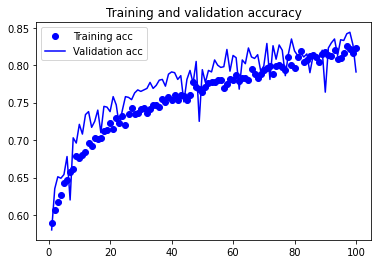

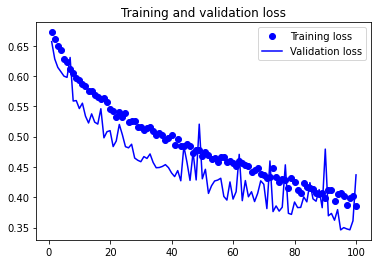

In [10]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()